 # L'ASSURANCE MALADIE : DATA AMELI

In [181]:
                                             ## Importations des bibliothèques ##
    
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import statsmodels as sts
import sklearn as sks
import os

In [182]:
                                    ## Importation du jeu de données ainsi que les 5 premières lignes ##
    
df_cpam_t = pd.read_csv("C:/Users/dell/Downloads/effectifs_2.csv", sep=';')
df_cpam_t.head(3)

,annee,patho_niv1,patho_niv2,patho_niv3,top,cla_age_5,sexe,region,dept,ntop,npop,prev,niveau_prioritaire,libelle_classe_age,libelle_sexe,tri
0,2017.0,Maladies psychiatriques,Autres troubles psychiatriques,Autres troubles psychiatriques,top_PsyAutr_ind,20-24,1.0,75,999,990.0,142550.0,0.691,"2,3",de 20 à 24 ans,hommes,49.0
1,2017.0,Maladies psychiatriques,Autres troubles psychiatriques,Autres troubles psychiatriques,top_PsyAutr_ind,20-24,1.0,76,12,50.0,6110.0,0.802,"2,3",de 20 à 24 ans,hommes,49.0
2,2017.0,Maladies psychiatriques,Autres troubles psychiatriques,Autres troubles psychiatriques,top_PsyAutr_ind,20-24,1.0,76,31,210.0,39350.0,0.523,"2,3",de 20 à 24 ans,hommes,49.0


## PARTIE I: VUE D'ENSEMBLE

## Step ** 1: Le PreProcessing

In [183]:
df_cpam_t = df_cpam_t.dropna(subset=['annee'])                        ## La suppression des Nas en fonction de variables année.
df_cpam_t = df_cpam_t.dropna(subset=['libelle_sexe'])
df_cpam_t['annee'] = df_cpam_t['annee'].astype('int64')
df_cpam_t.shape

(4057199, 16)

### Step-2: L\'analyse globale: En 2021, la prévalence et l'effectifs de patients par pathologies

In [184]:
                                    ## On fera une première analyse en 2021 et au global ##
    
df_cpam = df_cpam_t[(df_cpam_t['annee']==2021) & (df_cpam_t['libelle_sexe'] == 'tous sexes')
                        & (df_cpam_t['libelle_classe_age'] == 'tous âges') & (df_cpam_t["dept"] != "999") 
                        & (df_cpam_t["dept"] != "00")]
df_cpam.head(3)

,annee,patho_niv1,patho_niv2,patho_niv3,top,cla_age_5,sexe,region,dept,ntop,npop,prev,niveau_prioritaire,libelle_classe_age,libelle_sexe,tri
1241036,2021,Autres affections de longue durée (dont 31 et 32),Autres affections de longue durée (dont 31 et 32),Autres affections de longue durée (dont 31 et 32),top_ALDAutr_ind,tsage,9.0,11,92,38700.0,1666500.0,2.322,"1,2,3",tous âges,tous sexes,16.0
1241038,2021,Autres affections de longue durée (dont 31 et 32),Autres affections de longue durée (dont 31 et 32),Autres affections de longue durée (dont 31 et 32),top_ALDAutr_ind,tsage,9.0,24,37,15210.0,621540.0,2.447,"1,2,3",tous âges,tous sexes,16.0
1241040,2021,Autres affections de longue durée (dont 31 et 32),Autres affections de longue durée (dont 31 et 32),Autres affections de longue durée (dont 31 et 32),top_ALDAutr_ind,tsage,9.0,27,25,9590.0,545180.0,1.759,"1,2,3",tous âges,tous sexes,16.0


In [185]:
                                    ## On fera une première analyse en 2021 et au global ##
    
df_cpam_h2021 = df_cpam_t[(df_cpam_t['annee'] !=2021) & (df_cpam_t['libelle_sexe'] == 'tous sexes')
                        & (df_cpam_t['libelle_classe_age'] == 'tous âges') & (df_cpam_t["dept"] != "999")
                        & (df_cpam_t["dept"] != "00")]
df_cpam_h2021.head(3)

,annee,patho_niv1,patho_niv2,patho_niv3,top,cla_age_5,sexe,region,dept,ntop,npop,prev,niveau_prioritaire,libelle_classe_age,libelle_sexe,tri
1971,2017,Maladies psychiatriques,Autres troubles psychiatriques,Autres troubles psychiatriques,top_PsyAutr_ind,tsage,9.0,2,972,1460.0,359220.0,0.407,"2,3",tous âges,tous sexes,49.0
1972,2017,Maladies psychiatriques,Autres troubles psychiatriques,Autres troubles psychiatriques,top_PsyAutr_ind,tsage,9.0,4,974,3320.0,889000.0,0.374,"2,3",tous âges,tous sexes,49.0
1974,2017,Maladies psychiatriques,Autres troubles psychiatriques,Autres troubles psychiatriques,top_PsyAutr_ind,tsage,9.0,6,976,60.0,100540.0,0.055,"2,3",tous âges,tous sexes,49.0


#### Step 2-1: La prévalence

In [186]:
df_cpam_prev = df_cpam.groupby(['patho_niv1'])['prev'].agg('mean').reset_index().round(2).sort_values('prev', ascending = True)
df_cpam_prev.head(3)

,patho_niv1,prev
4,Insuffisance rénale chronique terminale,0.08
13,Séjours en hospitalisation complète pour prise...,0.36
7,Maladies inflammatoires ou rares ou VIH ou SIDA,0.55


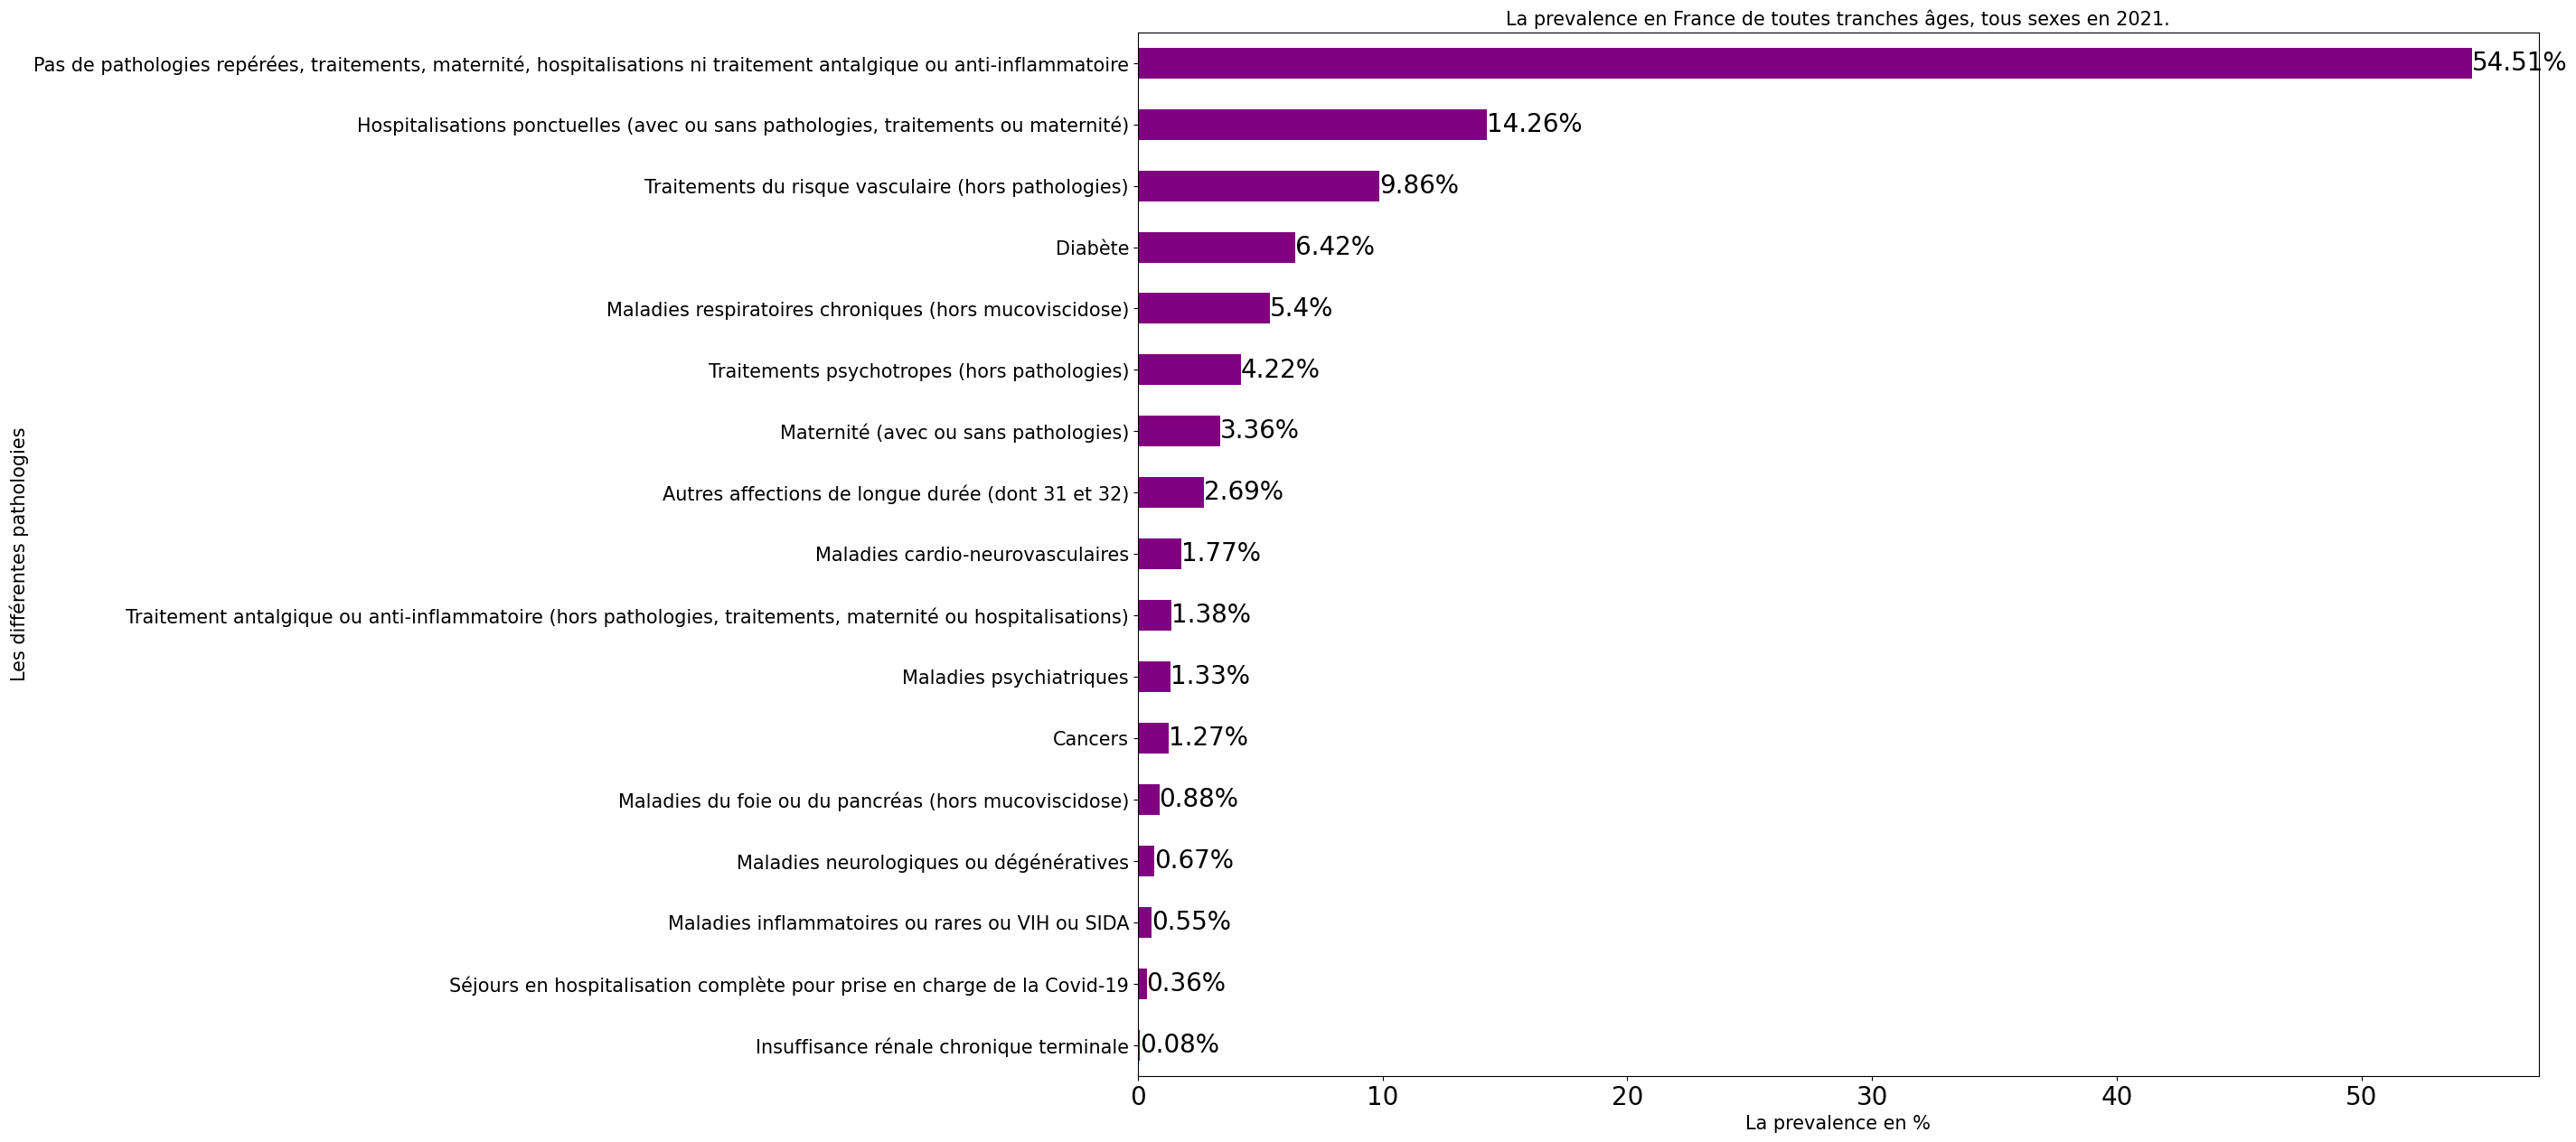

In [187]:
plt.rcParams["figure.figsize"] = [20,15]
labels = df_cpam_prev['prev'].astype('float').round(2).astype('str') + '%'
ax = df_cpam_prev.plot.barh(x='patho_niv1', y='prev', color =  'purple' )
ax.legend_ = None
for container in ax.containers:
    ax.bar_label(container, labels=labels, size=20)
matplotlib.pyplot.yticks (fontsize=15)
matplotlib.pyplot.xticks (fontsize=20)
plt.xlabel("La prevalence en %", size=15)
plt.ylabel("Les différentes pathologies", y = 0.5 , size=15)
plt.title("La prevalence en France de toutes tranches âges, tous sexes en 2021.", y=1, size=15)
plt.draw()

#### Step 2-2: L' évolution de la prévalence en dehors de 2021

In [188]:
pathologies = list(df_cpam_h2021["patho_niv1"].unique())[:17]

                                 # Les numéros correspondants à chaque pathologies 
    
# 0: 'Maladies psychiatriques',
#1:'Traitements psychotropes (hors pathologies)',
#2:'Pas de pathologies repérées, traitements, maternité, hospitalisations ni traitement antalgique ou anti-inflammatoire',
#3:'Maladies neurologiques ou dégénératives',
#4: 'Traitements du risque vasculaire (hors pathologies)',
#5: 'Autres affections de longue durée (dont 31 et 32)',
#6: 'Maladies respiratoires chroniques (hors mucoviscidose)',
#7: 'Maternité (avec ou sans pathologies)',
#8: 'Cancers',
#9: 'Maladies cardio-neurovasculaires',
#10: 'Insuffisance rénale chronique terminale',
#11: 'Séjours en hospitalisation complète pour prise en charge de la Covid-19',
#12: 'Traitement antalgique ou anti-inflammatoire (hors pathologies, traitements, maternité ou hospitalisations)',
#13: 'Maladies du foie ou du pancréas (hors mucoviscidose)',
#14: 'Diabète',
#15: 'Hospitalisations ponctuelles (avec ou sans pathologies, traitements ou maternité)',
#16: 'Maladies inflammatoires ou rares ou VIH ou SIDA'

In [190]:
x = input('Entrer un numéro qui correspond à une pathologie:(entre 0 et 16)')
i = int(x)

Entrer un numéro qui correspond à une pathologie:(entre 0 et 16)9


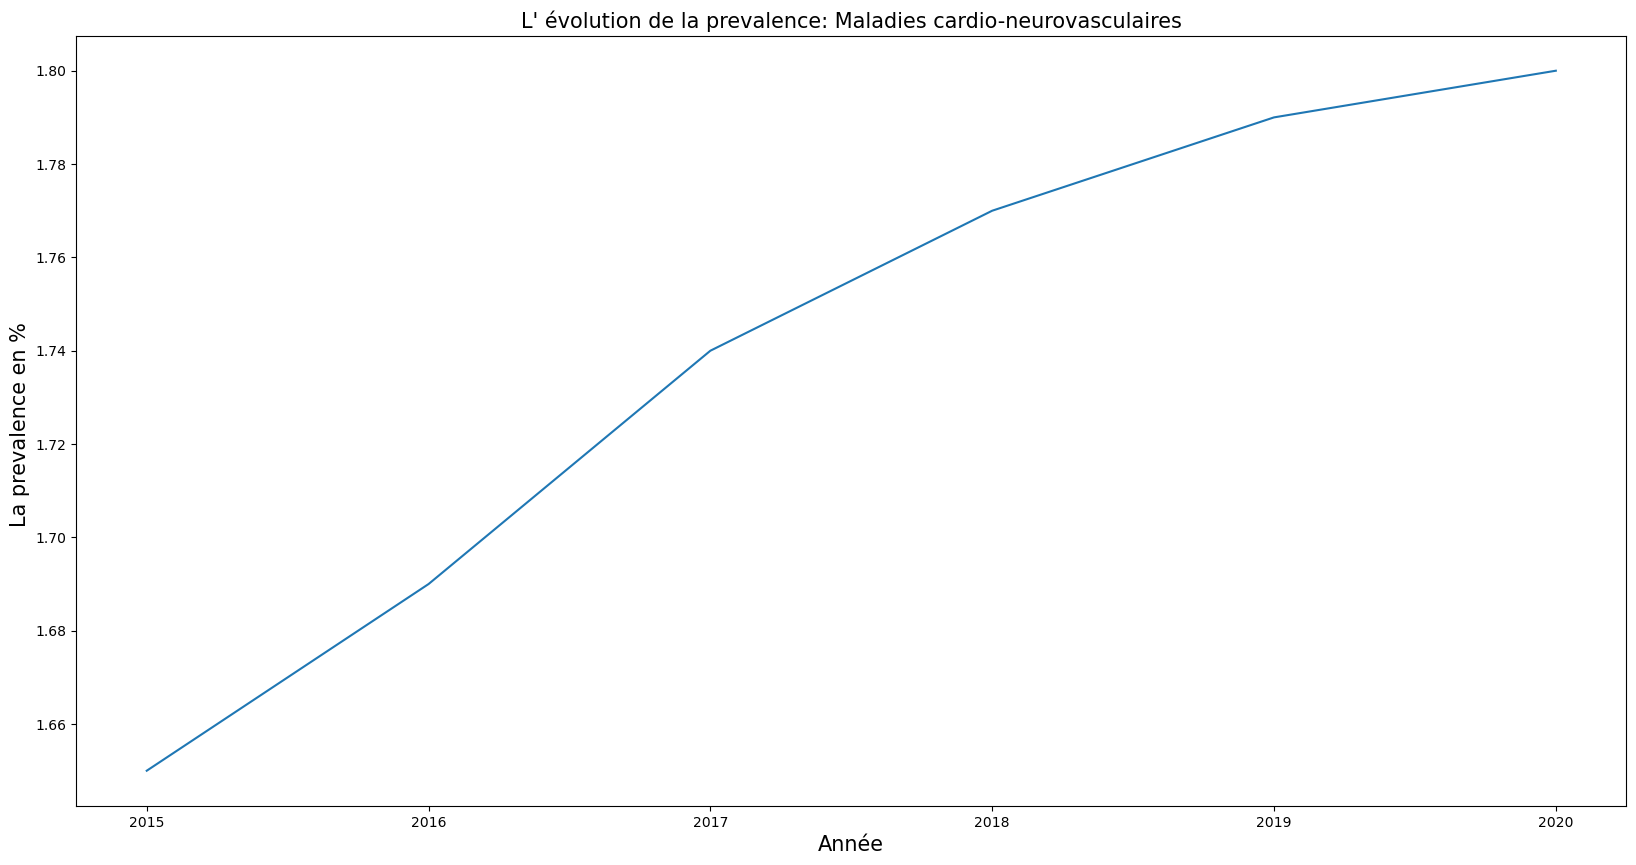

In [191]:
df_cpam_h2021_p = df_cpam_h2021[df_cpam_h2021["patho_niv1"] == pathologies[i]]
df_cpam_h2021_p_1 = df_cpam_h2021_p.groupby(['annee'])['prev'].agg('mean').reset_index().round(2).sort_values('annee', ascending = True)
df_cpam_h2021_p_1 = df_cpam_h2021_p_1.set_index('annee')

plt.rcParams["figure.figsize"] = [20,10]
df_cpam_h2021_p_1['prev'].plot()
plt.ylabel("La prevalence en % " , size=15)
plt.xlabel("Année", y = 0.5 , size=15)
plt.title("L\' évolution de la prevalence: "+ pathologies[i], y=1, size=15)
plt.draw()

#### Step 2-3: L' effectif

In [192]:
df_cpam_eff = df_cpam.groupby(['patho_niv1'])['ntop'].agg('sum').reset_index().round(2).sort_values('ntop', ascending = True)
df_cpam_eff.tail(5)

,patho_niv1,ntop
1,Cancers,10642970.0
16,Traitements psychotropes (hors pathologies),13616320.0
5,Maladies cardio-neurovasculaires,16602350.0
15,Traitements du risque vasculaire (hors patholo...,18751530.0
12,"Pas de pathologies repérées, traitements, mate...",38290990.0


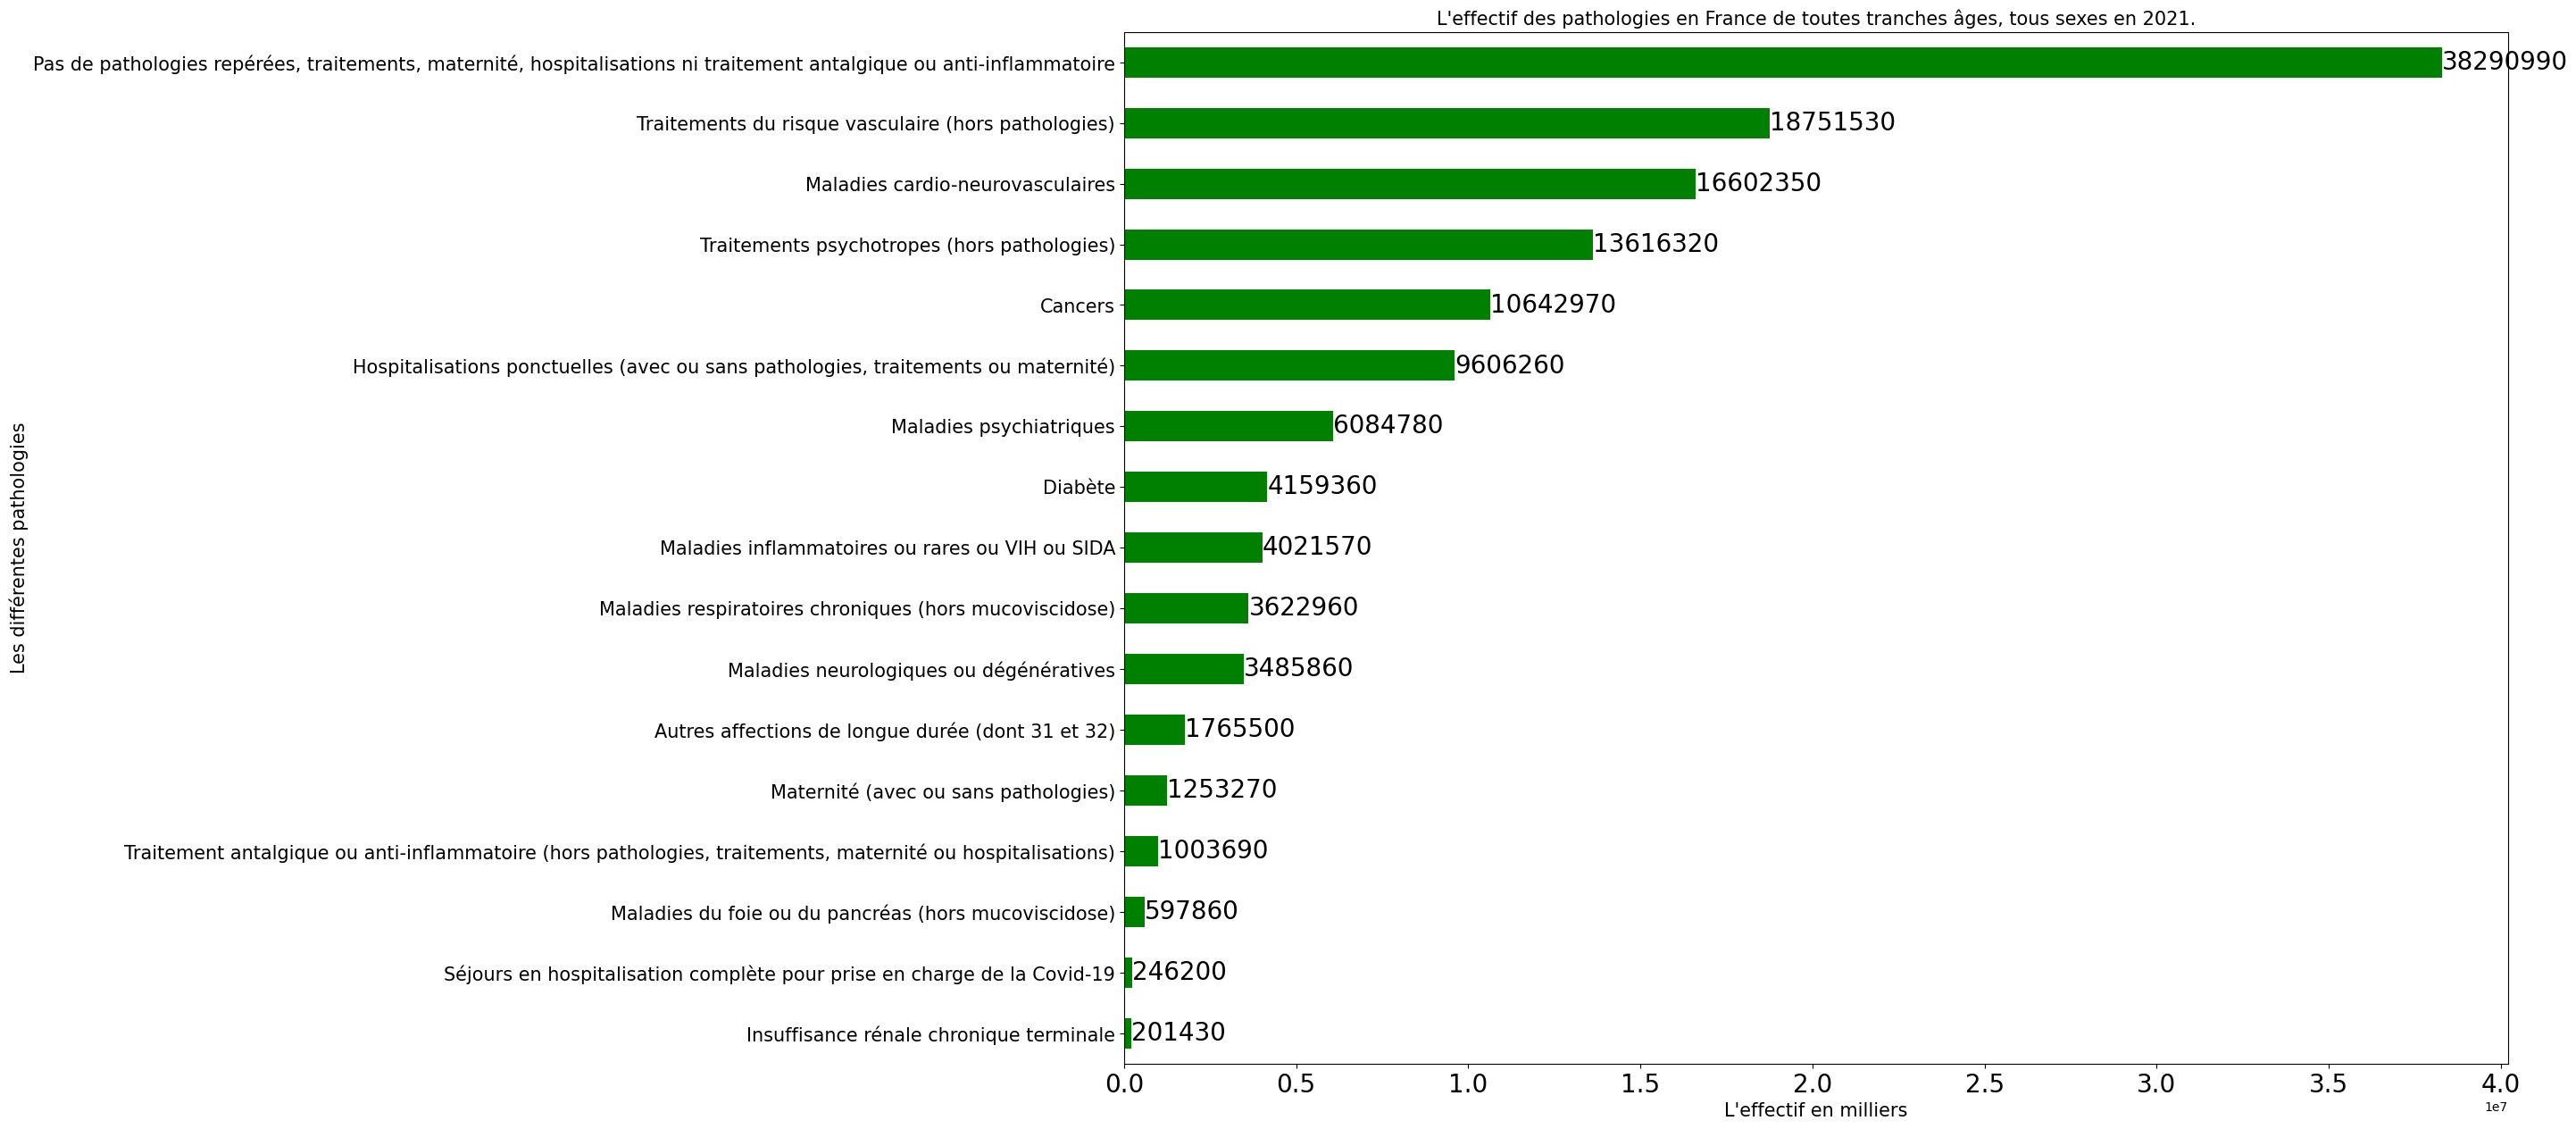

In [193]:
plt.rcParams["figure.figsize"] = [20,15]
labels = df_cpam_eff['ntop'].astype('int64').round(0).astype('str') + ''
ax = df_cpam_eff.plot.barh(x='patho_niv1', y='ntop', color =  'green' )
ax.legend_ = None
for container in ax.containers:
    ax.bar_label(container, labels=labels, size=20)
matplotlib.pyplot.yticks (fontsize=15)
matplotlib.pyplot.xticks (fontsize=20)
plt.xlabel("L'effectif en milliers", size=15)
plt.ylabel("Les différentes pathologies", y = 0.5 , size=15)
plt.title("L'effectif des pathologies en France de toutes tranches âges, tous sexes en 2021.", y=1, size=15)
plt.draw()

#### Step 2-4: L' évolution des personnes contaminées en dehors de 2021

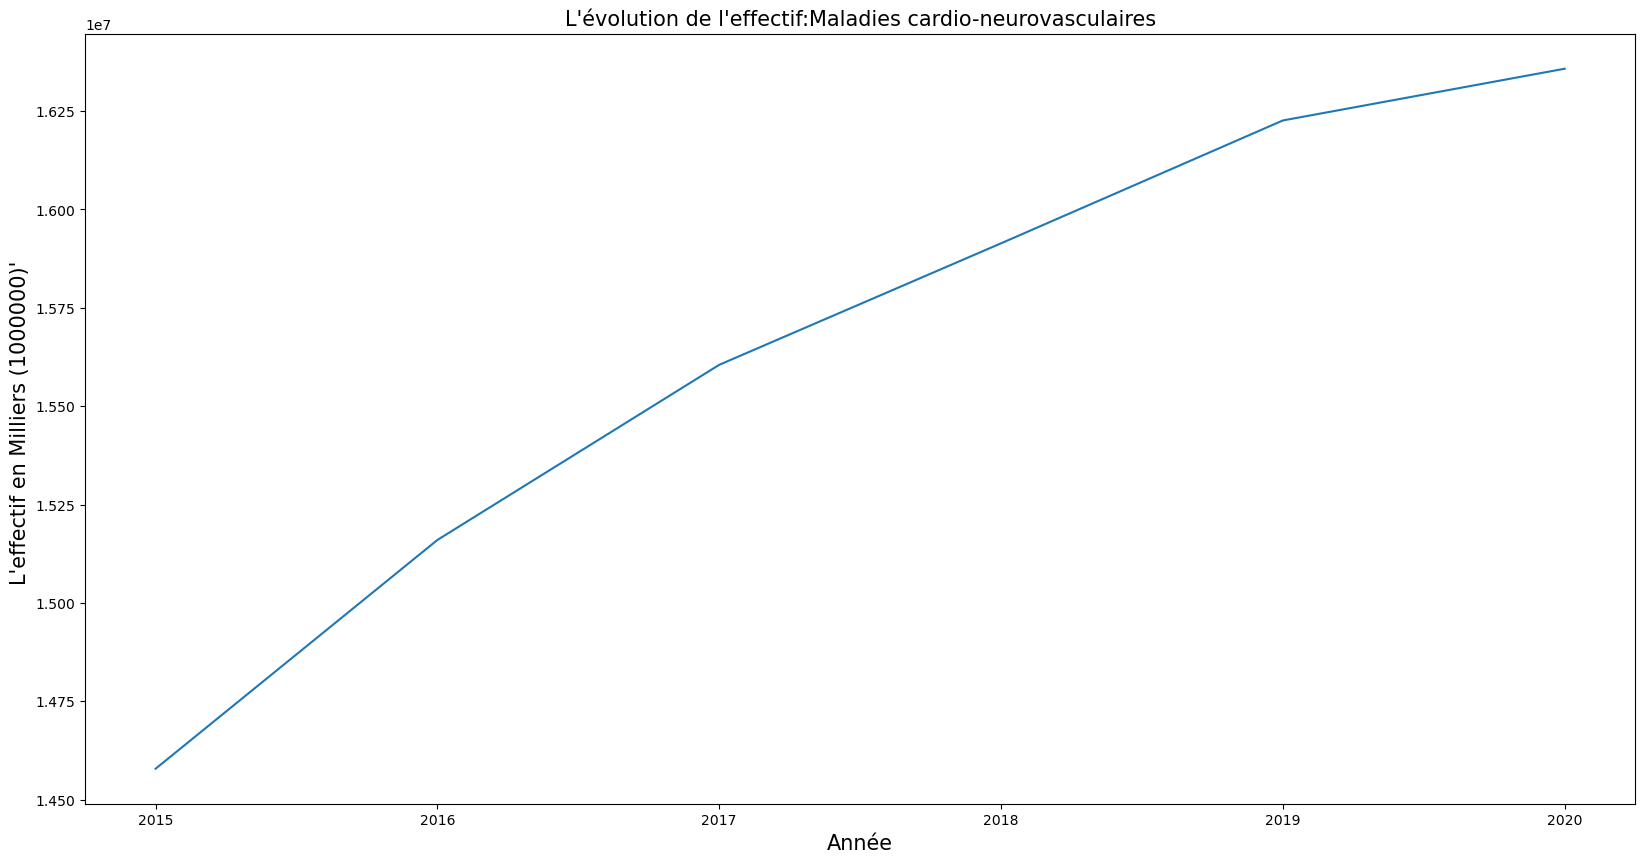

In [194]:
df_cpam_h2021_f = df_cpam_h2021[df_cpam_h2021["patho_niv1"] == pathologies[i]]
df_cpam_h2021_f_1 = df_cpam_h2021_f.groupby(['annee'])['ntop'].agg('sum').reset_index().round(2).sort_values('annee', ascending = True)
df_cpam_h2021_f_1 = df_cpam_h2021_f_1.set_index('annee')

plt.rcParams["figure.figsize"] = [20,10]
df_cpam_h2021_f_1['ntop'].plot()
plt.ylabel("L\'effectif en Milliers (1000000)' " , size=15)
plt.xlabel("Année", y = 0.5 , size=15)
plt.title("L\'évolution de l\'effectif:" + pathologies[i], y=1, size=15)
plt.draw()